In [ ]:
pip install progress_bar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for progress-bar: filename=progress_bar-8-py3-none-any.whl size=5589 sha256=accd6d4275feea35e97f89c5b349f3f7953e22a8085fc97adf3666c2fa3adfa1
  Stored in directory: /root/.cache/pip/wheels/a2/80/c8/65b31f1837a42cfa752d7f73708bc07f4d5a594f2a2afece1f
Successfully built progress-bar


In [1]:
import os, glob,  cv2
import numpy as np
# from progress_bar import *

In [2]:
import matplotlib.pyplot as plt
from matplotlib import ticker
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline 

In [3]:
from keras.models import Model
from keras.layers import Input, concatenate, Conv2D, MaxPooling2D, Conv2DTranspose
from tensorflow.keras.optimizers import Adam
from keras.callbacks import Callback
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from skimage.transform import resize

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Data preprocess

In [5]:
images_folder = '/content/gdrive/MyDrive/nt-dataset/sub-dataset/imgs'
masks_folder = '/content/gdrive/MyDrive/nt-dataset/sub-dataset/masks'

In [6]:
list_image_name = os.listdir(images_folder)
list_masks_name = os.listdir(masks_folder) 

print(list_image_name)
print(len(list_image_name))

print(list_masks_name)
print(len(list_masks_name))

['nt-17.png', 'nt-171.png', 'nt-120.png', 'nt-106.png', 'nt-93.png', 'nt-80.png', 'nt-66.png', 'nt-215.png', 'nt-214.png', 'nt-213.png', 'nt-211.png', 'nt-210.png', 'nt-209.png', 'nt-206.png', 'nt-178.png', 'nt-223.png', 'nt-222.png', 'nt-221.png', 'nt-218.png', 'nt-217.png', 'nt-216.png', 'nt-205.png', 'nt-204.png', 'nt-191.png', 'nt-165.png', 'nt-90.png', 'nt-186.png', 'nt-148.png', 'nt-133.png', 'nt-228.png', 'nt-227.png', 'nt-226.png', 'nt-224.png', 'nt-27.png', 'nt-12.png', 'nt-238.png', 'nt-225.png', 'nt-212.png', 'nt-79.png', 'nt-112.png', 'nt-1.png', 'nt-231.png', 'nt-229.png', 'nt-10.png', 'nt-9.png', 'nt-8.png', 'nt-7.png', 'nt-6.png', 'nt-4.png', 'nt-3.png', 'nt-240.png', 'nt-239.png', 'nt-237.png', 'nt-236.png', 'nt-235.png', 'nt-234.png', 'nt-53.png', 'nt-40.png', 'nt-51.png', 'nt-50.png', 'nt-49.png', 'nt-48.png', 'nt-47.png', 'nt-45.png', 'nt-44.png', 'nt-43.png', 'nt-41.png', 'nt-39.png', 'nt-38.png', 'nt-37.png', 'nt-36.png', 'nt-34.png', 'nt-33.png', 'nt-32.png', 'nt-

In [7]:
def load_path(imgs_dir, masks_dir):
  images = []
  masks = []

  for file in os.listdir(images_folder):
    images.append(os.path.join(images_folder, file))

  for file in os.listdir(masks_folder):
    masks.append(os.path.join(masks_folder, file))

  return images, masks

In [8]:
list_images_paths, list_masks_paths = load_path(images_folder, masks_folder)

In [9]:
list_images_paths.sort()
print(list_images_paths)
print(len(list_images_paths))

list_masks_paths.sort()
print(list_masks_paths)
print(len(list_masks_paths))

['/content/gdrive/MyDrive/nt-dataset/sub-dataset/imgs/nt-1.png', '/content/gdrive/MyDrive/nt-dataset/sub-dataset/imgs/nt-10.png', '/content/gdrive/MyDrive/nt-dataset/sub-dataset/imgs/nt-100.png', '/content/gdrive/MyDrive/nt-dataset/sub-dataset/imgs/nt-101.png', '/content/gdrive/MyDrive/nt-dataset/sub-dataset/imgs/nt-102.png', '/content/gdrive/MyDrive/nt-dataset/sub-dataset/imgs/nt-103.png', '/content/gdrive/MyDrive/nt-dataset/sub-dataset/imgs/nt-104.png', '/content/gdrive/MyDrive/nt-dataset/sub-dataset/imgs/nt-105.png', '/content/gdrive/MyDrive/nt-dataset/sub-dataset/imgs/nt-106.png', '/content/gdrive/MyDrive/nt-dataset/sub-dataset/imgs/nt-107.png', '/content/gdrive/MyDrive/nt-dataset/sub-dataset/imgs/nt-108.png', '/content/gdrive/MyDrive/nt-dataset/sub-dataset/imgs/nt-109.png', '/content/gdrive/MyDrive/nt-dataset/sub-dataset/imgs/nt-11.png', '/content/gdrive/MyDrive/nt-dataset/sub-dataset/imgs/nt-110.png', '/content/gdrive/MyDrive/nt-dataset/sub-dataset/imgs/nt-111.png', '/content/gdr

In [10]:
def show_img_with_mask(idx, images, masks):
    img = plt.imread(images[idx])
    mask = plt.imread(masks[idx])
    pair = np.concatenate((img, mask), axis=1)
    plt.figure(figsize=(15,20))
    plt.imshow(pair, cmap='gray')

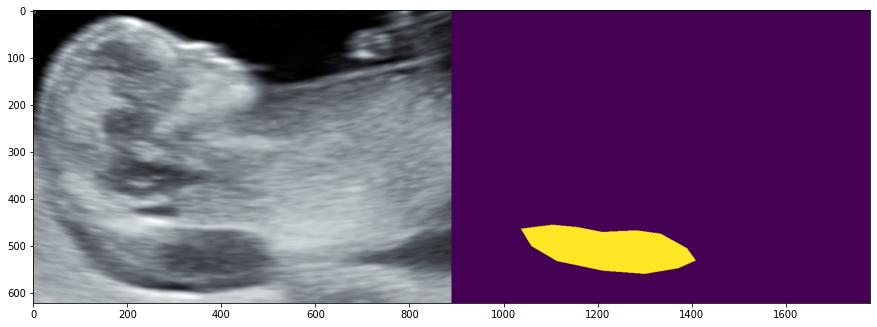

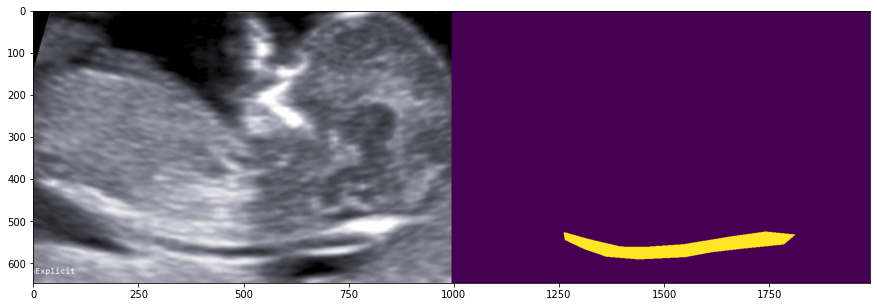

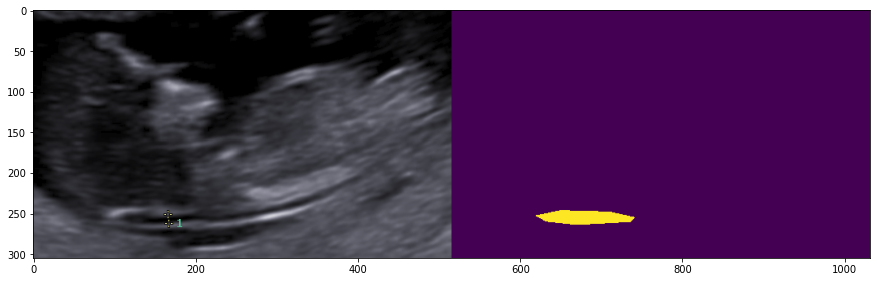

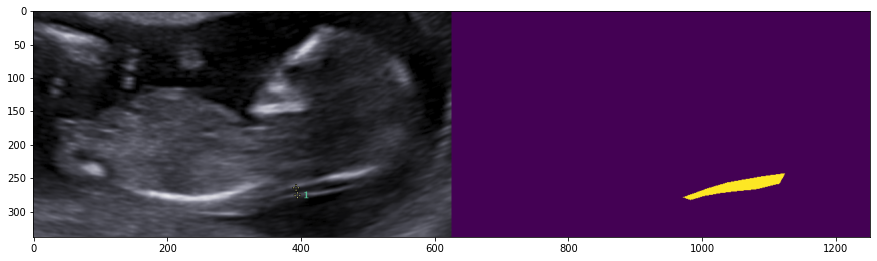

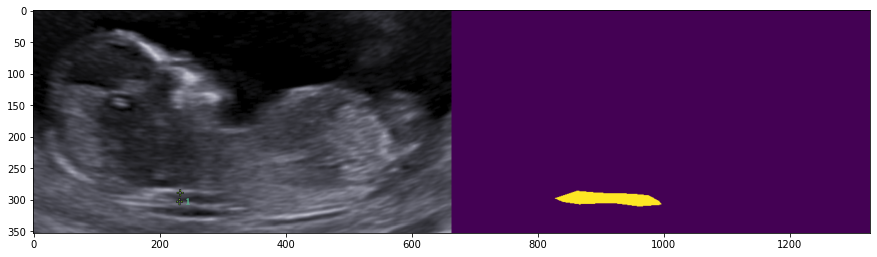

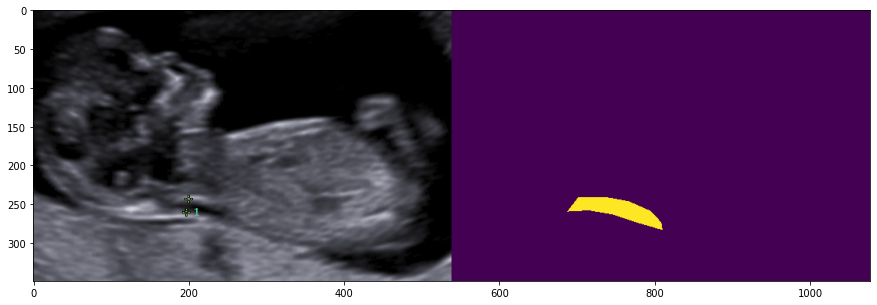

In [11]:
for i in range(6):
    show_img_with_mask(i, list_images_paths, list_masks_paths)

In [ ]:
train_image_paths, test_image_paths = train_test_split(list_images_paths, test_size=0.2, random_state=42)

print(train_image_paths)
print(len(train_image_paths))

print(test_image_paths)
print(len(test_image_paths))

In [13]:
def get_masks_corres(images_list):
  masks_list = []
  for i in range(0, len(images_list)):
    temp_list = images_list[i].split('/')
    temp_list[-2] = 'masks'
    masks_list.append('/'.join(temp_list))
  return masks_list

In [ ]:
train_mask_paths = get_masks_corres(train_image_paths)
test_mask_paths = get_masks_corres(test_image_paths)

print(train_image_paths)
print(train_mask_paths)
print(len(train_mask_paths))

print(test_image_paths)
print(test_mask_paths)
print(len(test_mask_paths))

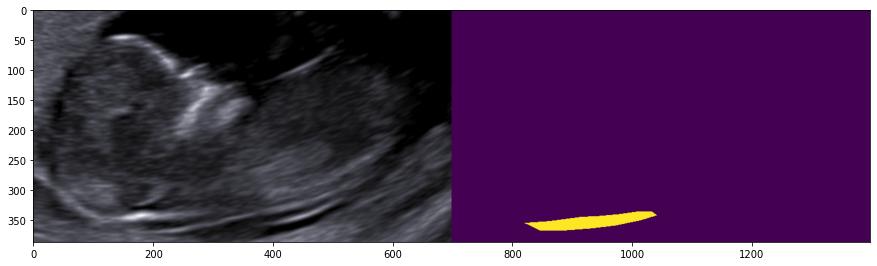

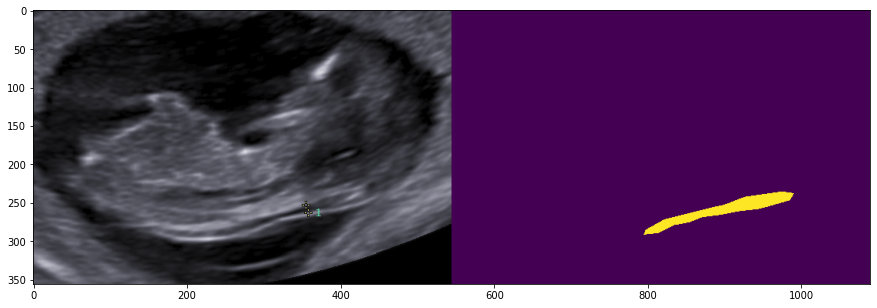

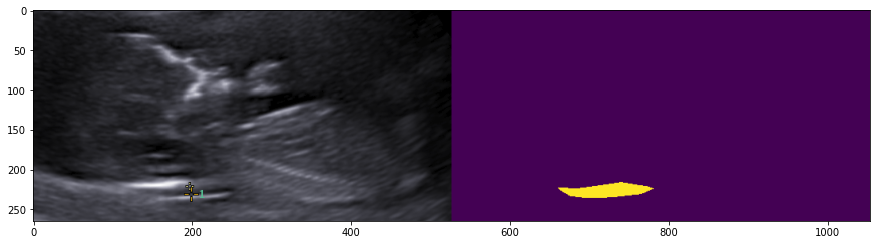

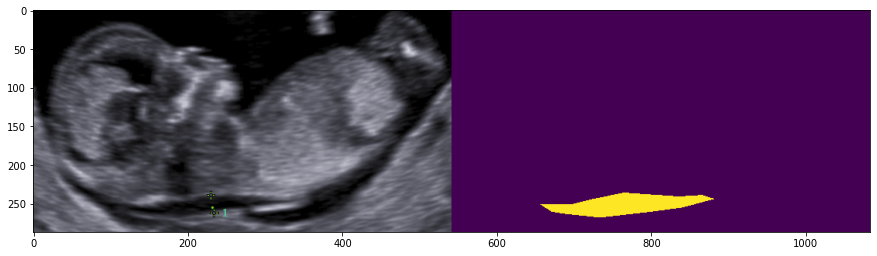

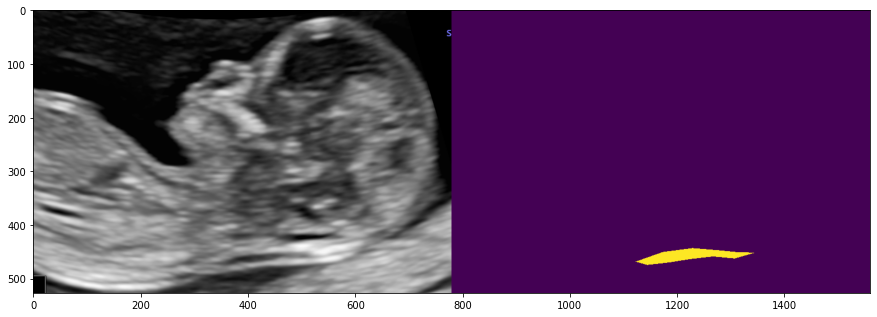

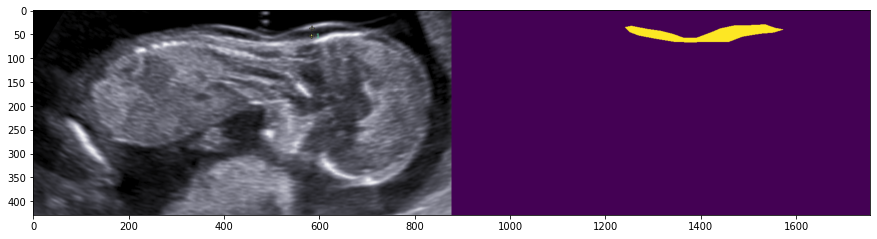

In [15]:
for i in range(6):
    show_img_with_mask(i, train_image_paths, train_mask_paths)

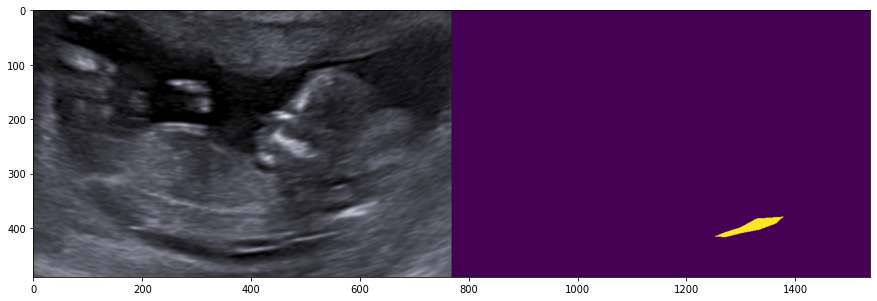

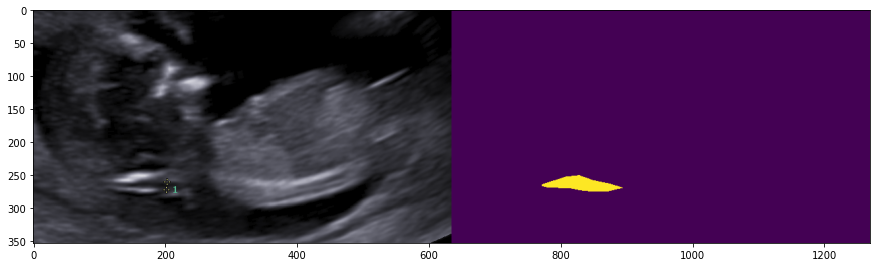

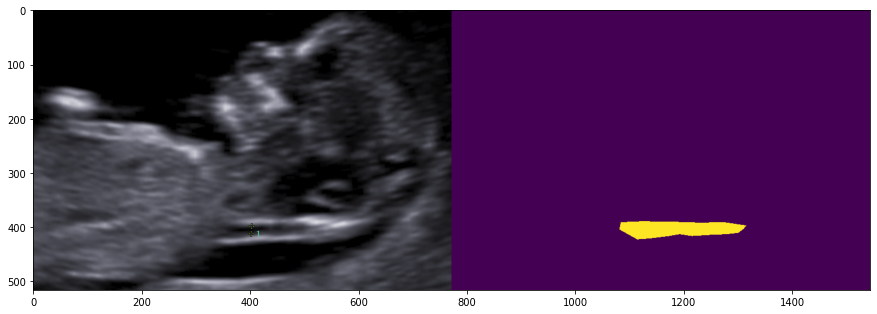

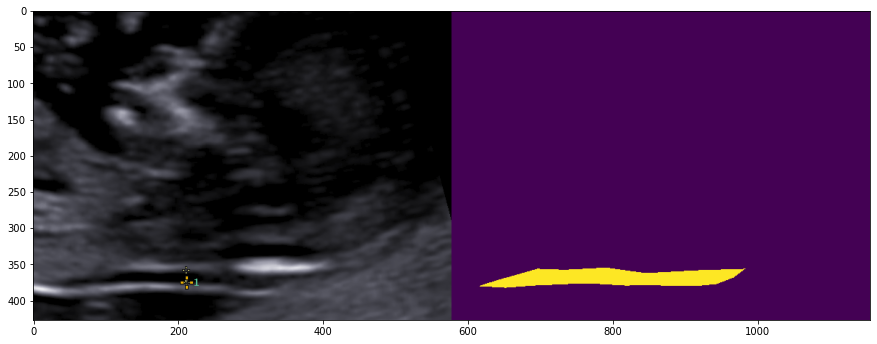

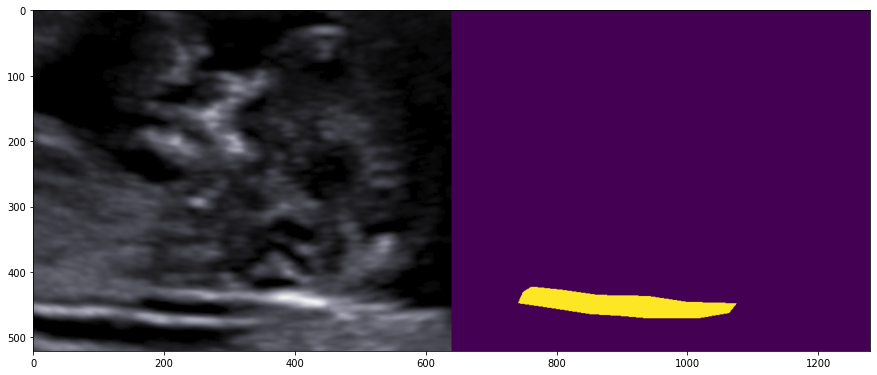

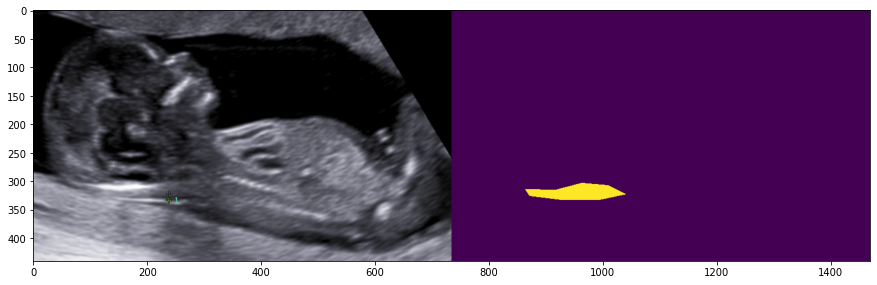

In [16]:
for i in range(6):
    show_img_with_mask(i, test_image_paths, test_mask_paths)

In [17]:
# Raw Image Size
IMAGE_ROWS = 420
IMAGE_COLS = 580

# Downsized Image Size
MIN_ROWS = 96
MIN_COLS = 96

train_images = train_image_paths
train_mask = train_mask_paths
test_images =  test_image_paths
test_mask = test_mask_paths

TRAIN_COUNT = len(train_images)
TEST_COUNT =  len(test_images)

print(TRAIN_COUNT)
print(TEST_COUNT)

192
48


In [18]:
dim = (IMAGE_COLS, IMAGE_ROWS)
def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    return img

In [19]:
def read_train():

    train = np.ndarray((TRAIN_COUNT, 1, IMAGE_ROWS, IMAGE_COLS), dtype=np.uint8)
    masks = np.ndarray((TRAIN_COUNT, 1, IMAGE_ROWS, IMAGE_COLS), dtype=np.uint8)

    print('Reading training images...')
    for i, img in enumerate(train_images):
      image = read_image(img)
      image = np.array([image])
      train[i] = image 
    
    for i, img in enumerate(train_mask):
      mask = read_image(img)
      mask = np.array([image])
      masks[i] = mask 

    np.save('imgs_train.npy', train)
    np.save('imgs_mask_train.npy', masks)

    print('Train data processed!')
    
    # return train, masks

In [20]:
def load_train():
    imgs_train = np.load('imgs_train.npy')
    imgs_mask_train = np.load('imgs_mask_train.npy')
    return imgs_train, imgs_mask_train

In [21]:
def read_test():
    
    test = np.ndarray((TEST_COUNT, 1, IMAGE_ROWS, IMAGE_COLS), dtype=np.uint8)
    test_ids = np.ndarray((TEST_COUNT, ), dtype=np.int32)

    print('Reading test images...')

    for i, img in enumerate(test_images):
        image = read_image(img)
        image = np.array([image])
        test[i] = image

        image_id = int(float(img.split('/')[-1].split('.')[0].split('-')[1]))
        test_ids[i] = image_id

    np.save('imgs_test.npy', test)
    np.save('imgs_id_test.npy', test_ids)
    print('Test data processed!')

    # return test, test_ids

In [22]:
def load_test():
    imgs_test = np.load('imgs_test.npy')
    imgs_id_test = np.load('imgs_id_test.npy')
    return imgs_test, imgs_id_test

In [23]:
read_train()
read_test()

Reading training images...
Train data processed!
Reading test images...
Test data processed!


In [24]:
dt_train, dt_train_masks = load_train()
dt_test, dt_test_ids = load_test()


print(dt_train.shape)
print(dt_train_masks.shape)
print(dt_test.shape)
print(dt_test_ids.shape)

(192, 1, 420, 580)
(192, 1, 420, 580)
(48, 1, 420, 580)
(48,)


In [25]:
def preprocess(imgs, sonogram=True):
    processed_images = np.ndarray((imgs.shape[0], imgs.shape[1], MIN_ROWS, MIN_COLS), dtype=np.uint8)
    for i in range(imgs.shape[0]):
        img = imgs[i, 0]
        if(sonogram):
            img = cv2.GaussianBlur(img,(7,7),0)
            img = cv2.equalizeHist(img)
        processed_images[i, 0] = cv2.resize(img, (MIN_COLS, MIN_ROWS), interpolation=cv2.INTER_CUBIC)
    processed_images = processed_images.astype('float32') # Float 32 for GPU usage
    return processed_images

In [26]:
print(dt_train.shape)

(192, 1, 420, 580)


In [27]:
train = preprocess(dt_train)
print ("Train Data Shape: {}".format(train.shape))

masks = preprocess(dt_train_masks, sonogram=False)
masks /= 255.0 # converts all mask pixels from 255 to 1
print ("Mask Labels Shape: {}".format(masks.shape))

test = preprocess(dt_test)
print ("Test Data Shape: {}".format(test.shape))

Train Data Shape: (192, 1, 96, 96)
Mask Labels Shape: (192, 1, 96, 96)
Test Data Shape: (48, 1, 96, 96)


In [28]:
imgs_train = train.astype('float32')
mean = np.mean(imgs_train)  # mean for data centering
std = np.std(imgs_train)  # std for data normalization

imgs_train -= mean
imgs_train /= std

imgs_mask_train = masks.astype('float32')
imgs_mask_train /= 255.  # scale masks to [0, 1]

In [29]:
smooth = 1.
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

In [30]:
def get_unet():
    input_img = Input((1, MIN_ROWS, MIN_COLS))
    
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2), padding='same')(conv1)

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2), padding='same')(conv2)

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2), padding='same')(conv3)

    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2), padding='same')(conv4)

    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)

    up6 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=1)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)

    up7 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=1)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)

    up8 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=1)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)

    up9 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=1)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)

    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

    model = Model(inputs=input_img, outputs=conv10)
                      
    model.compile(optimizer=Adam(learning_rate=1e-5), loss=dice_coef_loss, metrics=['accuracy'])

    return model

model = get_unet()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1, 96, 96)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 1, 96, 32)    27680       ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 1, 96, 32)    9248        ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 1, 48, 32)    0           ['conv2d_1[0][0]']               
                                                                                              

In [31]:
model_checkpoint = ModelCheckpoint('weights.h5', monitor='val_loss', save_best_only=True)

In [ ]:
batch_size = 20
epochs = 10
model.fit(imgs_train, imgs_mask_train, batch_size=20, epochs=10,  verbose=1, shuffle=True, validation_split=0.1, callbacks=model_checkpoint)

Epoch 1/10


InvalidArgumentError: ignored